In [1]:
import sys
sys.path.append("..")

import matplotlib.pyplot as plt
import numpy as np

from lib.dataset_wrapper import Dataset
from lib import abx_utils

In [13]:
DATASETS_NAME = ["pb2007"]
DISTANCE_TYPE = "cosine"
DISTANCES = [
    {
        "art_params": {
            "metric": DISTANCE_TYPE,
            "weight": 1,
        },
    },
    {
        "cepstrum": {
            "metric": DISTANCE_TYPE,
            "weight": 1,
        },
    },
    {
        "cepstrum": {
            "metric": DISTANCE_TYPE,
            "weight": 1,
        },
        "art_params": {
            "metric": DISTANCE_TYPE,
            "weight": 1,
        },
    },
]

In [14]:
abx_matrices = {}

for distance in DISTANCES:
    distance_signature = abx_utils.get_distance_signature(distance)
    
    main_dataset = None
    datasets_lab = {}
    datasets_features = {}
    for dataset_name in DATASETS_NAME:
        dataset = Dataset(dataset_name)
        if main_dataset is None:
            main_dataset = dataset
        datasets_lab[dataset_name] = dataset.lab
        dataset_features = {}

        for feature_type in distance.keys():
            items_features = dataset.get_items_data(feature_type)
            dataset_features[feature_type] = items_features

        datasets_features[dataset_name] = dataset_features

    consonants = main_dataset.phones_infos["consonants"]
    vowels = main_dataset.phones_infos["vowels"]

    consonants_indexes = abx_utils.get_datasets_phones_indexes(
        datasets_lab,
        consonants,
        vowels,
    )

    abx_matrix = abx_utils.get_abx_matrix(consonants, consonants_indexes, datasets_features, distance, 50)
    abx_matrices[distance_signature] = abx_matrix

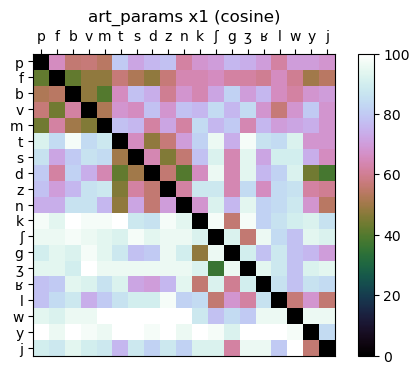

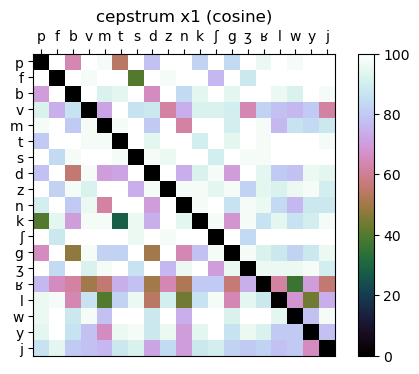

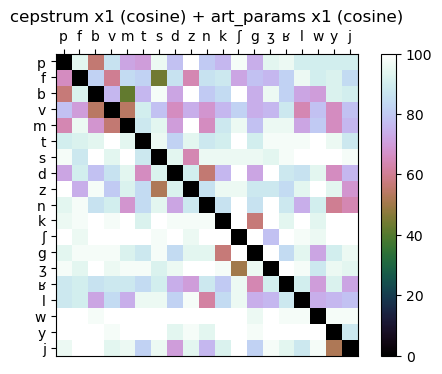

In [15]:
for distance_signature, abx_matrix in abx_matrices.items():
    plt.figure(dpi=100)
    ax = plt.subplot()
    ax.set_title(distance_signature)
    abx_utils.show_abx_matrix(ax, abx_matrix, consonants, main_dataset.phones_infos["notation"])
    plt.show()

art_params x1 (cosine) {'manner': 62.36666666666667, 'place': 82.83333333333334}
cepstrum x1 (cosine) {'manner': 90.8, 'place': 70.83333333333333}
cepstrum x1 (cosine) + art_params x1 (cosine) {'manner': 80.19999999999999, 'place': 83.33333333333333}


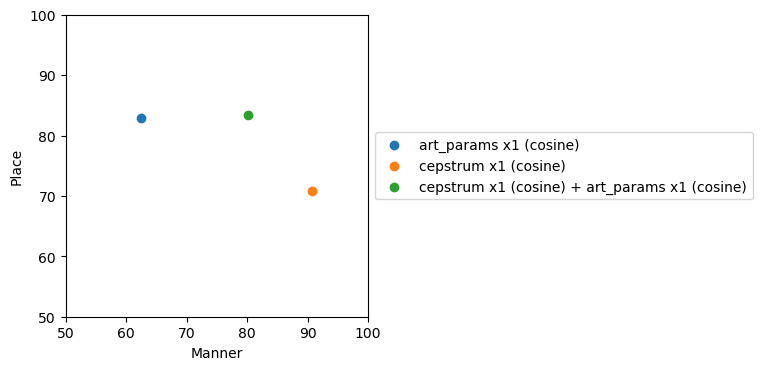

In [17]:
colors = {
    "art_params x1 (%s)" % DISTANCE_TYPE: "tab:blue",
    "cepstrum x1 (%s)" % DISTANCE_TYPE: "tab:orange",
    "cepstrum x1 (%s) + art_params x1 (%s)" % (DISTANCE_TYPE, DISTANCE_TYPE): "tab:green",
}

for dataset_name in DATASETS_NAME:
    dataset = Dataset(dataset_name)
    consonant_groups = dataset.phones_infos["consonant_groups"]
    
    plt.figure(dpi=100)

    ax = plt.subplot(aspect="equal")
    ax.set_xlim(50, 100)
    ax.set_ylim(50, 100)
    ax.set_xlabel("Manner")
    ax.set_ylabel("Place")

    # ax.set_title(distance_signature)

    for distance_signature, abx_matrix in abx_matrices.items():
        groups_score = abx_utils.get_groups_score(consonants, abx_matrix, consonant_groups)
        print(distance_signature, groups_score)
        ax.scatter(groups_score["manner"], groups_score["place"], c=colors[distance_signature], label=distance_signature)

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()